In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

**Foursquare data**

In [2]:
# read and check places for Budapest
fs_df = pd.read_parquet("../data/foursquare_budapest_places.parquet")
fs_df.head()

,fsq_place_id,name,latitude,longitude,address,locality,region,postcode,admin_region,post_town,...,date_refreshed,date_closed,tel,website,email,facebook_id,instagram,twitter,fsq_category_ids,fsq_category_labels
0,4ea915859adf64e06c381ab8,Mason Vegyesboltja,47.577529,19.056521,"1039 Budapest, Hunyadi utca 1",Budapest,Budapest,1039,None,None,...,2020-11-23,None,None,None,None,NaN,None,None,[4bf58dd8d48988d186941735],[Retail > Food and Beverage Retail > Liquor St...
1,53f5f610498eaf3f627da0d8,Babatorna,47.501225,19.141966,Andras Utca 19,Budapest,None,None,None,None,...,2020-11-26,None,None,None,None,NaN,None,None,[4f4528bc4b90abdf24c9de85],[Sports and Recreation]
2,4f2ff7f5e4b0d337d682018c,damasztor,47.447507,19.128356,Hunyadi u. 171.,Budapest,Budapest,1196,None,None,...,2020-11-30,None,(06 1) 720 9022,http://www.damasztor.hu,None,NaN,None,None,[4eb1bea83b7b6f98df247e06],[Business and Professional Services > Factory]
3,02cbc82878cb4e42f4b817b8,Kbfi-Unio Kft,47.417200,19.053620,Transzformátorgyár u. 3/B,Budapest,Budapest,1211,None,None,...,2023-08-16,None,(06 1) 278 2791,http://izotoptechnikabudapest.aranyoldalak.hu,kbfiunio@t-online.hu,NaN,None,None,[4d4b7105d754a06375d81259],[Business and Professional Services]
4,4d41e62eaed776eb57856897,Waytostay,47.495830,19.060830,"Rákóczi str., VII Erzsébetváros",Budapest,None,1072,None,None,...,2021-08-18,None,34931846865,http://www.waytostay.com,None,NaN,None,waytostay,[4bf58dd8d48988d1fa931735],[Travel and Transportation > Lodging > Hotel]


In [3]:
# read and check categories
fs_categories = pd.read_parquet("../data/foursquare_categories.parquet")
fs_categories.head()

,category_id,category_level,category_name,category_label,level1_category_id,level1_category_name,level2_category_id,level2_category_name,level3_category_id,level3_category_name,level4_category_id,level4_category_name,level5_category_id,level5_category_name,level6_category_id,level6_category_name
0,5745c2e4498e11e7bccabdbd,2,Drugstore,Retail > Drugstore,4d4b7105d754a06378d81259,Retail,5745c2e4498e11e7bccabdbd,Drugstore,None,None,None,None,None,None,None,None
1,63be6904847c3692a84b9c17,2,Skating,Sports and Recreation > Skating,4f4528bc4b90abdf24c9de85,Sports and Recreation,63be6904847c3692a84b9c17,Skating,None,None,None,None,None,None,None,None
2,4bf58dd8d48988d187941735,3,Track Stadium,Arts and Entertainment > Stadium > Track Stadium,4d4b7104d754a06370d81259,Arts and Entertainment,4bf58dd8d48988d184941735,Stadium,4bf58dd8d48988d187941735,Track Stadium,None,None,None,None,None,None
3,63be6904847c3692a84b9b40,3,Business Broker,Business and Professional Services > Financial...,4d4b7105d754a06375d81259,Business and Professional Services,63be6904847c3692a84b9b3d,Financial Service,63be6904847c3692a84b9b40,Business Broker,None,None,None,None,None,None
4,53d6c1b0e4b02351e88a83d4,4,Modern Greek Restaurant,Dining and Drinking > Restaurant > Greek Resta...,63be6904847c3692a84b9bb5,Dining and Drinking,4d4b7105d754a06374d81259,Restaurant,4bf58dd8d48988d10e941735,Greek Restaurant,53d6c1b0e4b02351e88a83d4,Modern Greek Restaurant,None,None,None,None


**Google Maps data**

This dataset is already cleaned up and could serve as a benchmark.

In [4]:
# read and check places for Budapest -- Google Maps
go_df = gpd.read_file("../data/google_budapest_pois_2021_cleaned.geojson")
go_df.head()

,place_id,rating,user_ratin,name,amenity_category,Cat_id,joint_amenity,osmid,mall,category_30,category_17,category_78,geometry
0,ChIJQ_iusm7fQUcRHMut_wY6JU8,5.0,1.0,Sport park,Hotel and lodging,A43,"campground,lodging,park",NaN,None,tourism,tourism,Hotel and lodging,POINT (18.95979 47.51573)
1,ChIJbecRRH7ZQUcRjlkos_XGpHE,2.0,1.0,foci és kosárpálya,Hotel and lodging,A43,"campground,lodging,park",NaN,None,tourism,tourism,Hotel and lodging,POINT (18.9531 47.5472)
2,ChIJofvOsPbFQUcRXW4J4DfjYOQ,5.0,2.0,pingpong asztalok,Hotel and lodging,A43,"campground,lodging,park",NaN,None,tourism,tourism,Hotel and lodging,POINT (19.19332 47.52868)
3,ChIJ2en8F7LDQUcRMJPLNXO311Y,NaN,NaN,focipálya,Hotel and lodging,A43,"campground,lodging,park",NaN,None,tourism,tourism,Hotel and lodging,POINT (19.14841 47.4543)
4,ChIJXZPDanbDQUcRMB5jcBWStIk,NaN,NaN,fitneszpark,Hotel and lodging,A43,"campground,lodging,park",NaN,None,tourism,tourism,Hotel and lodging,POINT (19.14854 47.4541)


**OSM data**

In [5]:
# read and check places for Budapest
osm_bp = gpd.read_file("../data/osm_budapest_places.geojson")
osm_bp.head()

,osm_id,osm_type,amenity_type,amenity_subtype,category,name,geometry_type,geometry
0,31929662,node,amenity,restaurant,amenity:restaurant,Kisherceg vendéglő,Point,POINT (19.22771 47.52502)
1,31929767,node,amenity,fuel,amenity:fuel,Orlen,Point,POINT (19.23583 47.52981)
2,74972961,node,amenity,None,None,None,Point,POINT (19.06608 47.5059)
3,81239646,node,amenity,fuel,amenity:fuel,MOL,Point,POINT (19.04655 47.55329)
4,89342617,node,amenity,parking_entrance,amenity:parking_entrance,None,Point,POINT (19.0571 47.56101)


**shape files**

<Axes: >

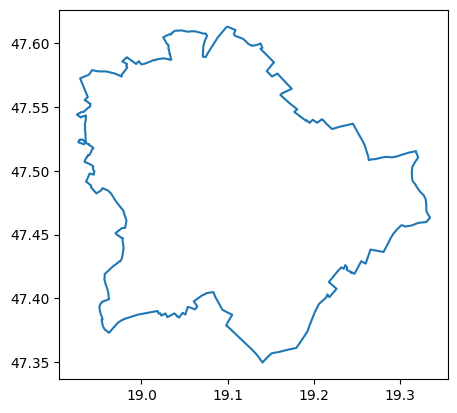

In [6]:
# read and plot -- Budapest boundary
bp_shape = gpd.read_file("../data/shape_files/bp_df_shape/bp_df.shp")
bp_shape.boundary.plot()

In [9]:
# read and plot -- Budapest boundary
neighborhoods = gpd.read_file("../data/shape_files/neighborhoods_admin10/neighborhoods_admin10.shp")
neighborhoods

,NAME,ADMIN_LEVE,geometry
0,Spanyolrét,10,"POLYGON ((2112699.59 6018965, 2112772.6 601908..."
1,Pösingermajor,10,"POLYGON ((2111761.05 6020133.92, 2111763.17 60..."
2,Csillebérc,10,"POLYGON ((2109069.37 6021358.42, 2109104.77 60..."
3,Széchenyihegy,10,"POLYGON ((2111479.44 6023985.83, 2111510.81 60..."
4,Svábhegy,10,"POLYGON ((2110649.62 6025166.75, 2110652.85 60..."
...,...,...,...
202,Károlyi városrész,10,"POLYGON ((2125961.872 6036476.804, 2123717.288..."
203,Újpest kertváros,10,"POLYGON ((2127489.909 6034874.341, 2125211.476..."
204,Újpest városközpont,10,"POLYGON ((2125214.476 6034779.134, 2125144.007..."
205,Dél-Újpest,10,"POLYGON ((2125227.572 6032400.913, 2125270.954..."


<Axes: >

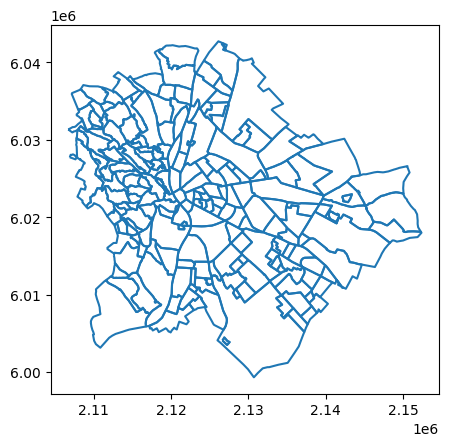

In [10]:
neighborhoods.boundary.plot()